# Pymaceuticals Inc.
---

### Analysis

i. Mouse ID b128 on the Capomulin regiment showed improvement with time. this regiment showed overall positive results with time
ii.Positive correlation on weight and tumor size; highlighting the need for well balanced lifestyle for shrinkage in tumor size and overall better health for the mice population.
iii.Capomulin and Ramicane had most usage amongst the regiments; the high usage can point to the positive results shown with these two. 

In [135]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single DataFrame
MouseStudy_data = pd.merge(mouse_metadata, study_results, how='right', on= 'Mouse ID')

# Display the data table for preview
MouseStudy_data.head(15)


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,b128,Capomulin,Female,9,22,0,45.0,0
1,f932,Ketapril,Male,15,29,0,45.0,0
2,g107,Ketapril,Female,2,29,0,45.0,0
3,a457,Ketapril,Female,11,30,0,45.0,0
4,c819,Ketapril,Male,21,25,0,45.0,0
5,h246,Ketapril,Male,13,30,0,45.0,0
6,p189,Ketapril,Male,8,28,0,45.0,0
7,n923,Ketapril,Male,19,30,0,45.0,0
8,q119,Ketapril,Male,17,30,0,45.0,0
9,f993,Naftisol,Male,21,28,0,45.0,0


In [136]:
# Checking the number of mice.
MouseStudy_data['Mouse ID'].nunique()

249

In [137]:
# Our data should be uniquely identified by Mouse ID and Timepoint
# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duplicate_mice = MouseStudy_data.loc[MouseStudy_data.duplicated(subset=['Mouse ID', 'Timepoint',]),'Mouse ID'].unique()
duplicate_mice

array(['g989'], dtype=object)

In [138]:
# Optional: Get all the data for the duplicate mouse ID. 
duplicate_mice_df = MouseStudy_data.loc[MouseStudy_data["Mouse ID"] == "g989", :]
duplicate_mice_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
107,g989,Propriva,Female,21,26,0,45.000000,0
137,g989,Propriva,Female,21,26,0,45.000000,0
329,g989,Propriva,Female,21,26,5,48.786801,0
360,g989,Propriva,Female,21,26,5,47.570392,0
620,g989,Propriva,Female,21,26,10,51.745156,0
681,g989,Propriva,Female,21,26,10,49.880528,0
815,g989,Propriva,Female,21,26,15,51.325852,1
869,g989,Propriva,Female,21,26,15,53.442020,0
950,g989,Propriva,Female,21,26,20,55.326122,1
1111,g989,Propriva,Female,21,26,20,54.657650,1


In [139]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean_mousestudy_data_df = MouseStudy_data[MouseStudy_data['Mouse ID'].isin(duplicate_mice)==False]
clean_mousestudy_data_df.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,b128,Capomulin,Female,9,22,0,45.0,0
1,f932,Ketapril,Male,15,29,0,45.0,0
2,g107,Ketapril,Female,2,29,0,45.0,0
3,a457,Ketapril,Female,11,30,0,45.0,0
4,c819,Ketapril,Male,21,25,0,45.0,0


In [140]:
# Checking the number of mice in the clean DataFrame.
clean_mousestudy_data_df['Mouse ID'].nunique()

248

## Summary Statistics

In [141]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 

dregimen_mean = clean_mousestudy_data_df.groupby('Drug Regimen')["Tumor Volume (mm3)"].mean()
dregimen_median = clean_mousestudy_data_df.groupby('Drug Regimen')["Tumor Volume (mm3)"].median()
dregimen_variance = clean_mousestudy_data_df.groupby('Drug Regimen')["Tumor Volume (mm3)"].var()
dregimen_std = clean_mousestudy_data_df.groupby('Drug Regimen')["Tumor Volume (mm3)"].std()
dregimen_sem = clean_mousestudy_data_df.groupby('Drug Regimen')["Tumor Volume (mm3)"].sem()


# Assemble the resulting series into a single summary DataFrame.

summary_stats_table = pd.DataFrame({"Mean Tumor Volume": dregimen_mean, 
                                    "Median Tumor Volume": dregimen_median, 
                                    "Tumor Volume Variance": dregimen_variance, 
                                    "Tumor Volume Std. Dev.": dregimen_std, 
                                    "Tumor Volume Std. Err.": dregimen_sem})

summary_stats_table




,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std. Dev.,Tumor Volume Std. Err.
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [142]:
# A more advanced method to generate a summary statistics table of mean, median, variance, standard deviation,
# and SEM of the tumor volume for each regimen (only one method is required in the solution)
# Using the aggregation method, produce the same summary statistics in a single line

summary_agg =  clean_mousestudy_data_df.groupby(['Drug Regimen'])[['Tumor Volume (mm3)']].agg(['mean', 'median', 'var', 'std', 'sem'])
summary_agg


Tumor Volume (mm3)                                          
                           mean     median        var       std       sem
Drug Regimen                                                             
Capomulin             40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin              52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol             52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril              55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol              54.331565  52.509285  66.173479  8.134708  0.596466
Placebo               54.033581  52.288934  61.168083  7.821003  0.581331
Propriva              52.320930  50.446266  43.852013  6.622085  0.544332
Ramicane              40.216745  40.673236  23.486704  4.846308  0.320955
Stelasyn              54.233149  52.431737  59.450562  7.710419  0.573111
Zoniferol             53.236507  51.818479  48.533355  6.966589  0.516398

## Bar and Pie Charts

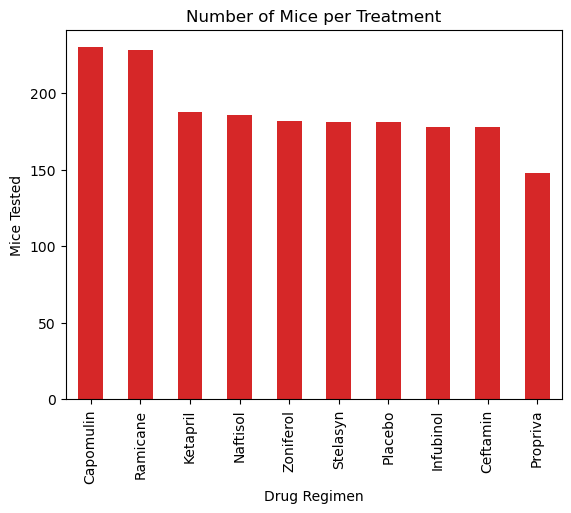

In [143]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas.
mice_count = clean_mousestudy_data_df["Drug Regimen"].value_counts()
plot_pandas = mice_count.plot.bar(color='tab:red')  


plt.xlabel("Drug Regimen")
plt.ylabel("Mice Tested")
plt.title("Number of Mice per Treatment")

plt.show()

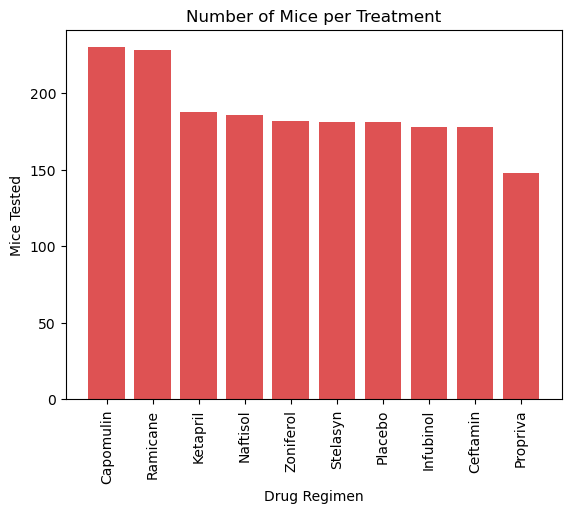

In [144]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using pyplot.

x_axis = mice_count.index.values
y_axis = mice_count.values
plt.bar(x_axis, y_axis, color='tab:red', alpha=0.8, align='center')
plt.xlabel("Drug Regimen")
plt.ylabel("Mice Tested")
plt.xticks(rotation="vertical")
plt.title("Number of Mice per Treatment")

plt.show()

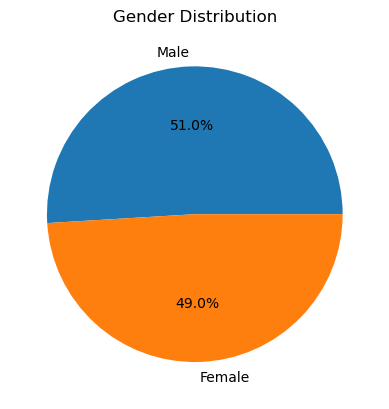

In [145]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
gender_dist = clean_mousestudy_data_df["Sex"].value_counts()  
gender_dist.plot.pie(autopct= "%1.1f%%")

plt.title("Gender Distribution")
plt.ylabel("")
plt.show()

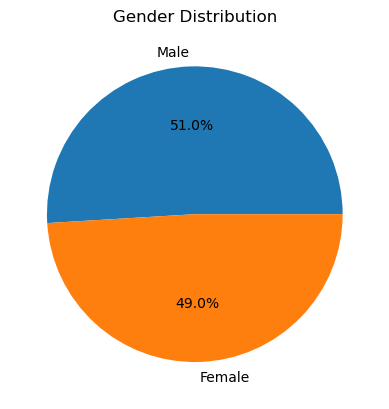

In [146]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
labels = ['Female', 'Male']
sizes = [49.7999197, 50.200803]
plot = gender_dist.plot.pie(y='Total Count', autopct="%1.1f%%")
plt.ylabel("")
plt.title("Gender Distribution")
plt.show()

## Quartiles, Outliers and Boxplots

In [147]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse


# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint


In [148]:
# Put treatments into a list for for loop (and later for plot labels)


# Create empty list to fill with tumor vol data (for plotting)


# Calculate the IQR and quantitatively determine if there are any potential outliers. 

    
    # Locate the rows which contain mice on each drug and get the tumor volumes

    
    # add subset 

    
    # Determine outliers using upper and lower bounds

max_timepoints = clean_mousestudy_data_df.groupby('Mouse ID')['Timepoint'].max()
merged_data = pd.merge(clean_mousestudy_data_df, max_timepoints, on=['Mouse ID', 'Timepoint'], how='inner')
treatments = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']
final_tumor_volumes = {}
for treatment in treatments:
    treatment_data = merged_data[merged_data['Drug Regimen'] == treatment]
    final_tumor_volumes[treatment] = treatment_data['Tumor Volume (mm3)']
    quartiles = final_tumor_volumes[treatment].quantile([0.25, 0.75])
    lower_q = quartiles[0.25]
    upper_q = quartiles[0.75]
    iqr = upper_q - lower_q
    lower_bound = lower_q - (1.5 * iqr)
    upper_bound = upper_q + (1.5 * iqr)
    outliers = final_tumor_volumes[treatment][(final_tumor_volumes[treatment] < lower_bound) | (final_tumor_volumes[treatment] > upper_bound)]

print(f"Treatment: {treatment}")
print(f"Potential outliers: {outliers}")
print(f"IQR: {iqr}")
print(f"Lower Bound: {lower_bound}")
print(f"Upper Bound: {upper_bound}\n")

Treatment: Ceftamin
Potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)
IQR: 15.577752179999997
Lower Bound: 25.355449580000002
Upper Bound: 87.66645829999999



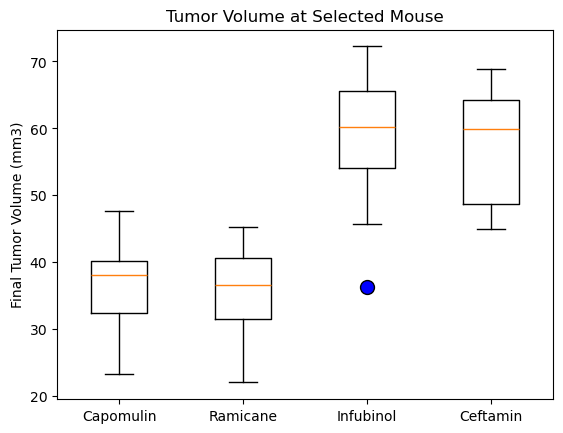

In [149]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.
blu_dot = dict(markerfacecolor="blue", markersize=10)
plt.boxplot(final_tumor_volumes.values(), labels=treatments, flierprops=blu_dot)
plt.ylabel('Final Tumor Volume (mm3)')
plt.title('Tumor Volume at Selected Mouse')
plt.show()

## Line and Scatter Plots

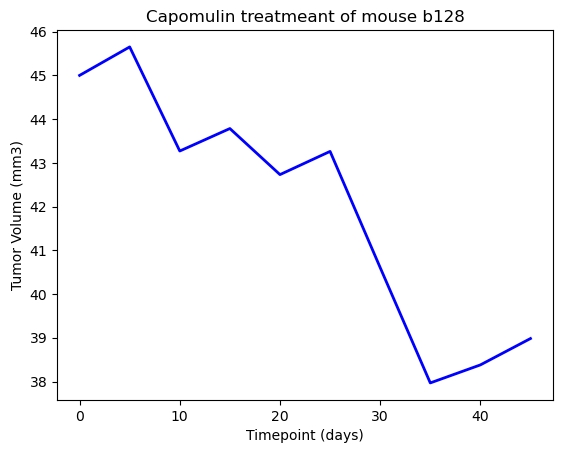

In [150]:
# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin

Capomulin_df = clean_mousestudy_data_df.loc[clean_mousestudy_data_df["Drug Regimen"] == "Capomulin",:]

forline_df = Capomulin_df.loc[Capomulin_df["Mouse ID"] == "b128",:]
forline_df.head()
x_axis = forline_df["Timepoint"]
tumsiz = forline_df["Tumor Volume (mm3)"]

fig1, ax1 = plt.subplots()
plt.title('Capomulin treatmeant of mouse b128')
plt.plot(x_axis, tumsiz,linewidth=2,color="blue", label="Fahreneit")
plt.xlabel('Timepoint (days)')
plt.ylabel('Tumor Volume (mm3)')
plt.show()


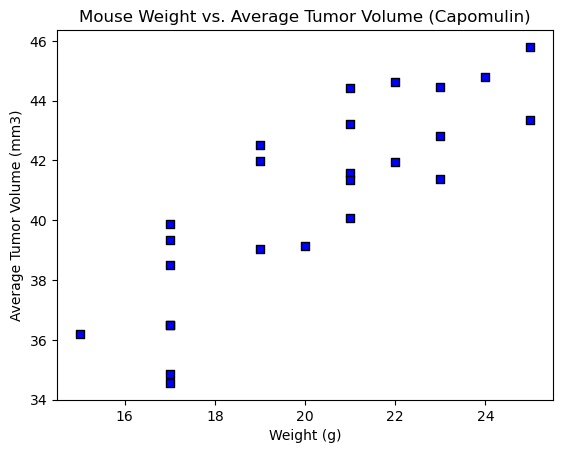

In [151]:
# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen
capomulin_avg_tumor_volume = Capomulin_df.groupby('Mouse ID')['Tumor Volume (mm3)'].mean()
capomulin_mouse_weight = Capomulin_df.groupby('Mouse ID')['Weight (g)'].mean()
plt.scatter(capomulin_mouse_weight, capomulin_avg_tumor_volume, marker='s', facecolors='blue', edgecolors='black')
plt.title('Mouse Weight vs. Average Tumor Volume (Capomulin)')
plt.xlabel('Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')

plt.show()


## Correlation and Regression

Correlation Coefficient: 0.841936342469472


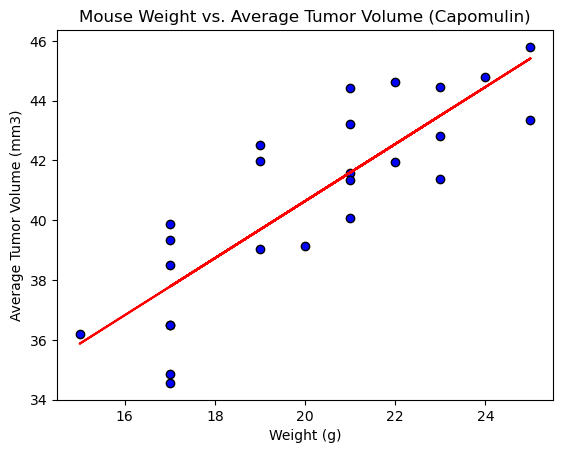

Slope: 0.9544396890241049
Intercept: 21.552160532685008


In [153]:
# Calculate the correlation coefficient and a linear regression model 
# for mouse weight and average observed tumor volume for the entire Capomulin regimen
from scipy.stats import linregress
correlation_coefficient = st.pearsonr(capomulin_mouse_weight, capomulin_avg_tumor_volume)[0]
print(f"Correlation Coefficient: {correlation_coefficient}")
slope, intercept, r_value, p_value, std_err = linregress(capomulin_mouse_weight, capomulin_avg_tumor_volume)
regression_line = slope * capomulin_mouse_weight + intercept
plt.scatter(capomulin_mouse_weight, capomulin_avg_tumor_volume, marker='o', facecolors='blue', edgecolors='black')
plt.plot(capomulin_mouse_weight, regression_line, color='red')
plt.title('Mouse Weight vs. Average Tumor Volume (Capomulin)')
plt.xlabel('Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')
plt.show()
print(f"Slope: {slope}")
print(f"Intercept: {intercept}")